In [ ]:
# Importer les packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# package utiliser pour créer des figures interactives 
import plotly.express as px  
import plotly.graph_objects as go
from ipywidgets import interact,widgets
# ce package contient des cartes
import folium

In [ ]:
# Importer les données
deces_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirme_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
retabli_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
etat_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [ ]:
print(deces_df.shape)
print(confirme_df.shape)
print(retabli_df.shape)
print(etat_df.shape)

(269, 304)
(269, 304)
(256, 304)
(191, 14)


In [ ]:
#etat_df 

#Country_Region // les payes 
#Last_Update	// la deniere mise a jour 
#Lat/Long_	// les cordonnées GPS pour positionné les payes 
#Confirmed	// le nombre des cas confirmé 
#Deaths	// le nombre des decées 
#Recovered	// le nombre des cas retablies 
#Active	// la difference entre cas confirmé et rétablies 
#Incident_Rate 	
#People_Tested 	
#People_Hospitalized	
#Mortality_Rate	
#UID	
#ISO3 // abreviation du payes 

In [ ]:
etat_df.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-11-17 13:26:34,33.93911,67.709953,43628.0,1638.0,35160.0,6830.0,112.072590,NaN,NaN,3.754470,4,AFG
1,Albania,2020-11-17 13:26:34,41.15330,20.168300,28432.0,631.0,13453.0,14348.0,987.976927,NaN,NaN,2.219330,8,ALB
2,Algeria,2020-11-17 13:26:34,28.03390,1.659600,68589.0,2168.0,45148.0,21273.0,156.413611,NaN,NaN,3.160857,12,DZA
3,Andorra,2020-11-17 13:26:34,42.50630,1.521800,5914.0,76.0,4830.0,1008.0,7654.177182,NaN,NaN,1.285086,20,AND
4,Angola,2020-11-17 13:26:34,-11.20270,17.873900,13615.0,324.0,6523.0,6768.0,41.425452,NaN,NaN,2.379728,24,AGO
5,Antigua and Barbuda,2020-11-17 13:26:34,17.06080,-61.796400,134.0,4.0,127.0,3.0,136.835226,NaN,NaN,2.985075,28,ATG
6,Argentina,2020-11-17 13:26:34,-38.41610,-63.616700,1318384.0,35727.0,1140196.0,142461.0,2917.051299,NaN,NaN,2.709908,32,ARG
7,Armenia,2020-11-17 13:26:34,40.06910,45.038200,118870.0,1811.0,78343.0,38716.0,4011.495548,NaN,NaN,1.523513,51,ARM
8,Australia,2020-11-17 13:26:34,-25.00000,133.000000,27760.0,907.0,25504.0,1349.0,109.035063,NaN,NaN,3.267291,36,AUS
9,Austria,2020-11-17 13:26:34,47.51620,14.550100,214597.0,1945.0,136487.0,76165.0,2382.716735,NaN,NaN,0.906350,40,AUT


*preprocessing du data *

In [ ]:
# pour afficher les valeurs manquantes
etat_df.isnull().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                5
Active                   0
Incident_Rate            2
People_Tested          191
People_Hospitalized    191
Mortality_Rate           0
UID                      0
ISO3                     2
dtype: int64

In [ ]:
# pour supprimer les valeurs manquantes 
etat_df.dropna(how='any',inplace=False).shape 

(0, 14)

In [ ]:
etat_df.isnull().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                5
Active                   0
Incident_Rate            2
People_Tested          191
People_Hospitalized    191
Mortality_Rate           0
UID                      0
ISO3                     2
dtype: int64

In [ ]:
# vu que j ai beaucoup de valeurs manquantes donc la solution c est les remplires par 'empty'au lieu de les supprimer '
etat_df['ISO3'].fillna(value='empty',inplace=True)

In [ ]:
etat_df['People_Hospitalized'].fillna(value='empty',inplace=True)
etat_df['People_Tested'].fillna(value='empty',inplace=True)
etat_df['Incident_Rate'].fillna(value='empty',inplace=True)
etat_df['Recovered'].fillna(value='empty',inplace=True)
etat_df['Lat'].fillna(value='empty',inplace=True)
etat_df['Long_'].fillna(value='empty',inplace=True)


In [ ]:
etat_df.isnull().sum()

Country_Region         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Incident_Rate          0
People_Tested          0
People_Hospitalized    0
Mortality_Rate         0
UID                    0
ISO3                   0
dtype: int64

In [ ]:
 # supprimer les doublons  
 etat_df.drop_duplicates(inplace=False).sum()

Country_Region         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
Last_Update            2020-11-17 13:26:342020-11-17 13:26:342020-11-...
Confirmed                                                     5.5175e+07
Deaths                                                       1.32988e+06
Active                                                        1.8366e+07
People_Tested          emptyemptyemptyemptyemptyemptyemptyemptyemptye...
People_Hospitalized    emptyemptyemptyemptyemptyemptyemptyemptyemptye...
Mortality_Rate                                                   426.652
UID                                                                98751
ISO3                   AFGALBDZAANDAGOATGARGARMAUSAUTAZEBHSBHRBGDBRBB...
dtype: object

In [ ]:
country=['China','Germany','Morocco']
etat_df[etat_df['Country_Region'].isin(country)]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
36,China,2020-11-17 13:26:34,30.5928,114.305,91876.0,4742.0,86630,504.0,6.54072,empty,empty,5.161304,156,CHN
66,Germany,2020-11-17 13:26:34,51.1657,10.4515,822053.0,12850.0,522743,286460.0,981.158,empty,empty,1.563160,276,DEU
119,Morocco,2020-11-17 13:26:34,31.7917,-7.0926,296189.0,4850.0,243359,47980.0,802.451,empty,empty,1.637468,504,MAR


In [ ]:
etat_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [ ]:
# la suppression des colonnes inutiles 
global_data=etat_df.copy().drop(['Country_Region','Last_Update', 'Lat', 'Long_','Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],axis=1)
#Afficher les statistiques au niveau monde / la somme de tout les cas 
global_synthese=pd.DataFrame(global_data.sum()).transpose()
global_synthese

,Confirmed,Deaths
0,55174990.0,1329875.0


In [ ]:
etat_df.shape

(191, 14)

In [ ]:
# Visualiser les pays les plus touchés en les colorants
fig=go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:red'
  y='background-color:purple'
  g='background-color:grey'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,4]=y
  df1.iloc[:,5]=r
  df1.iloc[:,6]=g

  return df1

def show_cases(n):
  n=int(n)
  return etat_df.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')

ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig],layout=ipywLayout)


interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [ ]:
#classé les données en facon descendante 
etat_class_df= etat_df.sort_values('Confirmed',ascending=False)
etat_class_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [ ]:
#classification des payés les plus touché par coronavirus  en diagrame battants
etat_class_df.columns
px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Confirmed',
  title='Les 10 pays les plus touchés par coronavirus (cas confirmés)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [ ]:
# affiché les decées  
etat_class_df.columns
px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Deaths',
  title='Les 10 pays les plus touchés par coronavirus (cas decès)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [ ]:
# afficher les cas retablis 
etat_class_df.columns
px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Recovered',
  title='Les 10 pays les plus touchés par coronavirus (cas rétablis)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [ ]:
# Visualiser les données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(confirme_df)):
  folium.Circle(
      location=[confirme_df.iloc[i]['Lat'],confirme_df.iloc[i]['Long']],
      fill=True,
      radius=(int((np.log(confirme_df.iloc[i,-1]+1.00001)))+0.2)*50000,
      color='red',
      fill_color='indigo',
      tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirme_df.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirme: "+str(confirme_df.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(deces_df.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(deces_df.iloc[i,-1]/(confirme_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m)
m


In [ ]:
# Visualiser la situation dans un pays (france)
conf_fr=confirme_df[confirme_df['Country/Region']=='France']
deces_fr=deces_df[deces_df['Country/Region']=='France']
retabli_fr=retabli_df[retabli_df['Country/Region']=='France']

In [ ]:
# Préparation des donées (france)
conf_fr=conf_fr.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
deces_fr=deces_fr.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
retabli_fr=retabli_fr.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

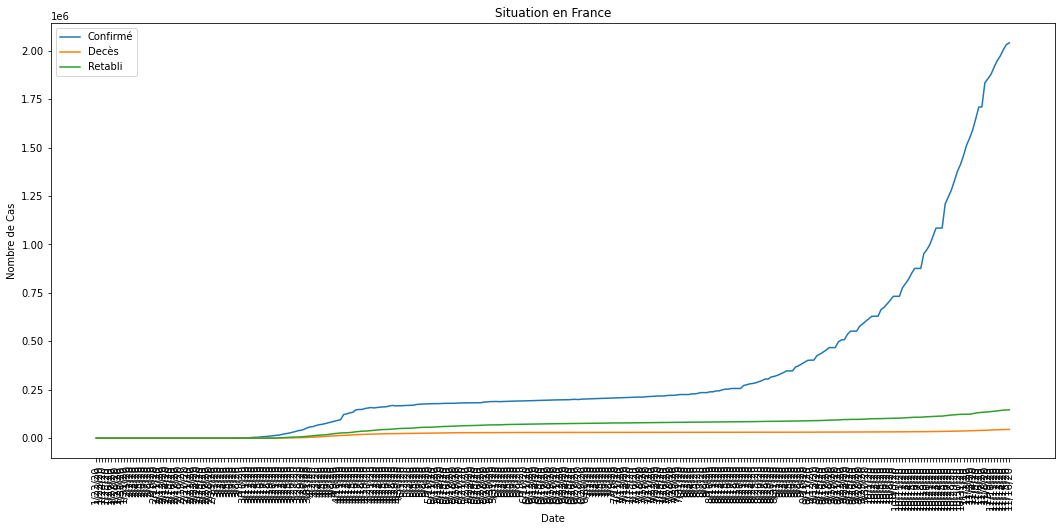

In [ ]:
# Dessin de la courbe
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(conf_fr.index,conf_fr.values,label='Confirmé')
ax.plot(deces_fr.index,deces_fr.values,label='Decès')
ax.plot(retabli_fr.index,retabli_fr.values,label='Retabli')

plt.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Nombre de Cas',title='Situation en France')
plt.legend()